# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [5]:
# Make Data
x_1 = np.linspace(start=-3,stop=3,num=500)

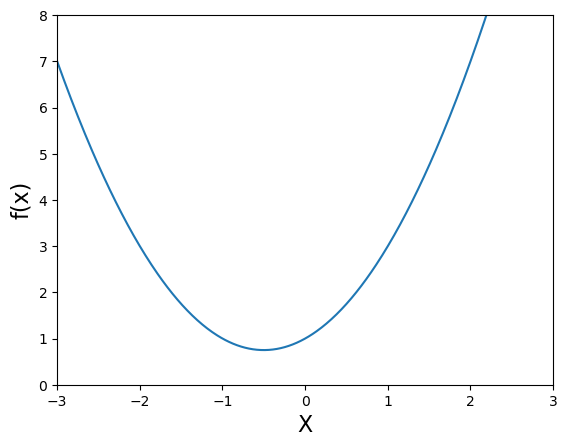

In [10]:
# Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1));

## Slope & Derivatives

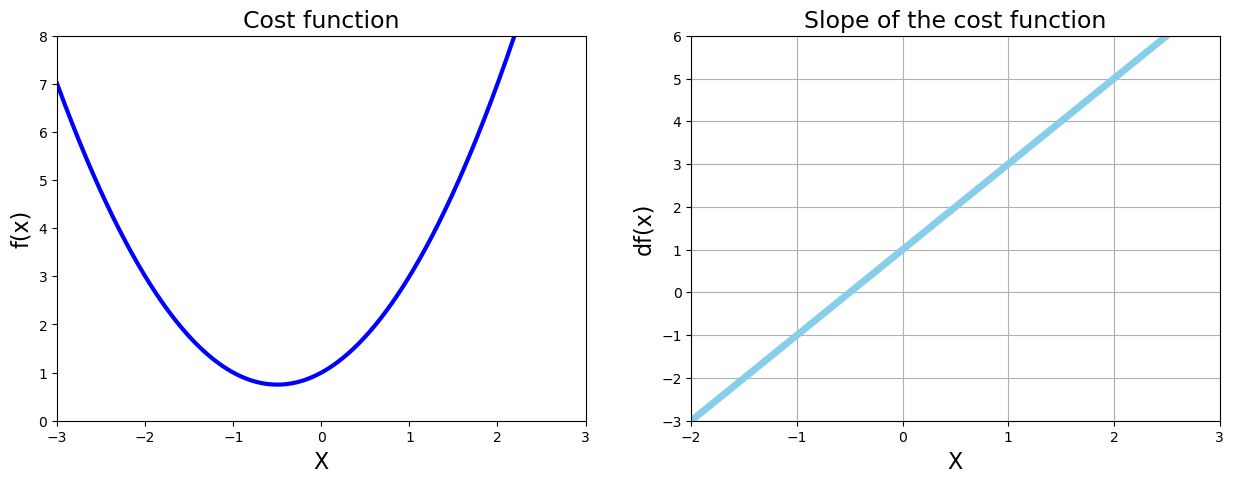

In [22]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5);

In [11]:
def df(x):
    return 2*x + 1